In [2]:
consumer_key = "UODXYhgdi5iSUkb8B3BIludZ0"
consumer_secret = "JxXDM9xoSjFGXlsWWPRLFGcHeahOKpx7W9uAKWsM0BVHOhyN8f"
access_token = "964513788606189570-oIVsHe3QKcReJDE3Z2lSiFjga9CTcUc"
access_secret_token = "mQzFGI4dIfftUGbzND5ZB67ddCkZfYMFMtG0OsoamDyVi"

In [3]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret_token)

api = tw.API(auth)

In [4]:
tweets = api.home_timeline()
for tweet in tweets:
    print('{real_name} (@{name}) {location} said {tweet}\n\n'.format(
        real_name=tweet.author.name, name=tweet.author.screen_name, location = tweet.author.location,
        tweet=tweet.text))

PMO India (@PMOIndia) India said PM @narendramodi will address a webinar for consultation towards effective implementation of Union Budget provision… https://t.co/yZC7hVewQb


PMO India (@PMOIndia) India said Furthering connectivity and prosperity in West Bengal. https://t.co/LM93Ag42d1


PMO India (@PMOIndia) India said Accelerating Assam’s development. https://t.co/boQFqIa5lS


Hina Khan (@eyehinakhan) Mumbai, India said Much much congratulations to @rahulvaidya23 You really played well..Your journey was a parallel in this season and… https://t.co/ZvoNuXfjGf


Hina Khan (@eyehinakhan) Mumbai, India said Ruby Ruby Rubiiiiiinaaaaaa 
Super proud hai Team Hiiiiiinnnnaaaaa 
Congratulations Love 
@RubiDilaik https://t.co/NFVDTxlfSJ


PRIYANKA (@priyankachopra)  said Self-care Sunday featuring @AnomalyHaircare’s Deep Treatment Mask! Packed with rich castor seed &amp; avocado oil, it’s… https://t.co/anACp9a3QH


NIA SHARMA (@Theniasharma) India said ✨😊😇😉😀 https://t.co/adqoSEkIdV


NIA SHARMA

In [5]:
search_words = ["corona","covid19","coronavirus"]
date_since = "2020-01-1"

In [7]:
tweets = tw.Cursor(api.search,
              q=search_words,
              lang="en",
              since=date_since).items(1000)
users_locs = [[tweet.user.screen_name, tweet.user.location, tweet.text] for tweet in tweets]
tweet_text = pd.DataFrame(data=users_locs, 
                    columns=['user', "location" , "tweet"])
tweet_text.to_csv("corona.csv")

In [8]:
csv_data = pd.read_csv("corona.csv")
csv_data

,Unnamed: 0,user,location,tweet
0,0,MukasaAMaat,Deep State,RT @DrEricDing: 📍OUTBREAK OF #B117 AT SEVEN SC...
1,1,mukta_rahman,NaN,"RT @albd1971: Public Message from DGHS, Minist..."
2,2,DixieYoungBeer,"Ohio, USA","RT @DrGJackBrown: Tomorrow, in DC, @JoeBiden w..."
3,3,ongare_winnie,Mombasa,RT @antonioguterres: I renew my call for a glo...
4,4,themainepain,NaN,RT @bern_identity: Nice for POTUS to hold a mo...
...,...,...,...,...
195,195,atulabraham3,"india,maharastra",RT @mathrubhumieng: Karnataka violates unlock ...
196,196,SChs420,NaN,RT @AdityaINCUP: If any student of AKTU gets i...
197,197,Manish95122679,NaN,RT @sudarsansand: Protection against #COVID19 ...
198,198,frankkuipers2,NaN,"RT @DrGJackBrown: Tomorrow, in DC, @JoeBiden w..."


In [9]:
for tweet in tweets:
    print('{tweet}\n\n'.format( tweet=tweet.text))

In [11]:
import sys , csv , re
!pip install TextBlob
from textblob import TextBlob
import matplotlib.pyplot as plt

In [12]:
print(csv_data['tweet'])

0      RT @DrEricDing: 📍OUTBREAK OF #B117 AT SEVEN SC...
1      RT @albd1971: Public Message from DGHS, Minist...
2      RT @DrGJackBrown: Tomorrow, in DC, @JoeBiden w...
3      RT @antonioguterres: I renew my call for a glo...
4      RT @bern_identity: Nice for POTUS to hold a mo...
                             ...                        
195    RT @mathrubhumieng: Karnataka violates unlock ...
196    RT @AdityaINCUP: If any student of AKTU gets i...
197    RT @sudarsansand: Protection against #COVID19 ...
198    RT @DrGJackBrown: Tomorrow, in DC, @JoeBiden w...
199    when untruth has turned evil\n\nbrutally evil\...
Name: tweet, Length: 200, dtype: object


In [13]:
import tweepy as tw
import pandas as pd
import folium
from folium.plugins import MarkerCluster
from geopy.geocoders import Nominatim
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2

class SentimentAnalysis:
    
    def __init__(self):
        self.tweets = []
        self.tweetText = []
    
    
    def DownloadData(self):       
        consumer_key = "UODXYhgdi5iSUkb8B3BIludZ0"
        consumer_secret = "JxXDM9xoSjFGXlsWWPRLFGcHeahOKpx7W9uAKWsM0BVHOhyN8f"
        access_token = "964513788606189570-oIVsHe3QKcReJDE3Z2lSiFjga9CTcUc"
        access_secret_token = "mQzFGI4dIfftUGbzND5ZB67ddCkZfYMFMtG0OsoamDyVi"
        auth = tw.OAuthHandler(consumer_key, consumer_secret)
        auth.set_access_token(access_token, access_secret_token)
        api = tw.API(auth)
        search_words = "#corona"
        date_since = "2020-01-1"
        NoOfTerms = 100
        tweets = tw.Cursor(api.search,q=search_words,lang="en",since=date_since).items(NoOfTerms)
        users_locs = [[tweet.user.screen_name, tweet.user.location, tweet.text] for tweet in tweets]
        tweet_text = pd.DataFrame(data=users_locs, columns=['user', "location" , "tweet"])
        tweet_text.to_csv("corona.csv")
        data = pd.read_csv("./corona.csv",engine="python")
        
        geolocator = Nominatim(user_agent="myapp")
        world_map= folium.Map(tiles="cartodbpositron")
        marker_cluster = MarkerCluster().add_to(world_map)
        polarity = 0
        positive = 0
        wpositive = 0
        spositive = 0
        negative = 0
        wnegative = 0
        snegative = 0
        neutral = 0
        for i in range(NoOfTerms):
            tweetText = data.loc[i,['tweet']].tweet
            tweetloc = data.loc[i,['location']].location
            try:
                location = geolocator.geocode(tweetloc)
                lat = location.latitude
                long = location.longitude
            except:
                lat =47.470706
                long = -99.704723
            radius=2
            
            analysis = TextBlob(tweetText)
            polarity += analysis.sentiment.polarity
            if (analysis.sentiment.polarity == 0):  # adding reaction of how people are reacting to find average later
                neutral += 1
                folium.CircleMarker(location = [lat, long], radius=radius,color='yellow', fill =True).add_to(world_map)
            elif (analysis.sentiment.polarity > 0 and analysis.sentiment.polarity <= 0.3):
                wpositive += 1
                folium.CircleMarker(location = [lat, long], radius=radius,color='green', fill =True).add_to(world_map)
            elif (analysis.sentiment.polarity > 0.3 and analysis.sentiment.polarity <= 0.6):
                positive += 1
                folium.CircleMarker(location = [lat, long], radius=radius,color='red', fill =True).add_to(world_map)
            elif (analysis.sentiment.polarity > 0.6 and analysis.sentiment.polarity <= 1):
                spositive += 1
                folium.CircleMarker(location = [lat, long], radius=radius,color='blue', fill =True).add_to(world_map)
            elif (analysis.sentiment.polarity > -0.3 and analysis.sentiment.polarity <= 0):
                wnegative += 1
                folium.CircleMarker(location = [lat, long], radius=radius,color='black', fill =True).add_to(world_map)
            elif (analysis.sentiment.polarity > -0.6 and analysis.sentiment.polarity <= -0.3):
                negative += 1
                folium.CircleMarker(location = [lat, long], radius=radius,color='cyan', fill =True).add_to(world_map)
            elif (analysis.sentiment.polarity > -1 and analysis.sentiment.polarity <= -0.6):
                snegative += 1 
                folium.CircleMarker(location = [lat, long], radius=radius,color='voilet', fill =True).add_to(world_map)
            
        plot(world_map)
        
            
    def get_continent(col):
        try:
            cn_a2_code =  country_name_to_country_alpha2(col)
        except:
            cn_a2_code = 'Unknown'
        try:
            cn_continent = country_alpha2_to_continent_code(cn_a2_code)
        except:
            cn_continent = 'Unknown' 
        return (cn_a2_code, cn_continent)
            
        
    def geolocate(country):
        try:
        # Geolocate the center of the country
            loc = geolocator.geocode(country)
        # And return latitude and longitude
            return (loc.latitude, loc.longitude)
        except:
        # Return missing value
            return (22.3511148 ,78.6677428)
    
            
        
    def cleanTweet(self,tweet):
        # Remove Links, Special Characters etc from tweet
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) | (\w +:\ / \ / \S +)", " ", tweet).split())

    
    
    def percentage(self, part, whole):
        temp = 100 * float(part) / float(whole)
        return format(temp, '.2f')

    
    def plotPieChart(self, positive, wpositive, spositive, negative, wnegative, snegative, neutral, searchTerm, NoOfTerms):
        labels = ['Positive [' + str(positive) + '%]', 'Weakly Positive [' + str(wpositive) + '%]','Strongly Positive [' + str(spositive) + '%]', 'Neutral [' + str(neutral) + '%]',
                  'Negative [' + str(negative) + '%]', 'Weakly Negative [' + str(wnegative) + '%]', 'Strongly Negative [' + str(snegative) + '%]']
        sizes = [positive, wpositive, spositive, neutral, negative, wnegative, snegative]
        colors = ['yellowgreen','lightgreen','darkgreen', 'gold', 'red','lightsalmon','darkred']
        patches, texts = plt.pie(sizes, colors=colors, startangle=90)
        plt.legend(patches, labels, loc="best")
        plt.title('How people are reacting on ' + search_words + ' by analyzing ' + str(NoOfTerms) + ' Tweets.')
        plt.axis('equal')
        plt.tight_layout()
        plt.show()
        


In [14]:
sa = SentimentAnalysis()
sa.DownloadData()

NameError: name 'plot' is not defined

In [176]:
sa.world_map

AttributeError: 'SentimentAnalysis' object has no attribute 'world_map'

In [15]:
consumer_key = "UODXYhgdi5iSUkb8B3BIludZ0"
consumer_secret = "JxXDM9xoSjFGXlsWWPRLFGcHeahOKpx7W9uAKWsM0BVHOhyN8f"
access_token = "964513788606189570-oIVsHe3QKcReJDE3Z2lSiFjga9CTcUc"
access_secret_token = "mQzFGI4dIfftUGbzND5ZB67ddCkZfYMFMtG0OsoamDyVi"
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret_token)
api = tw.API(auth)
search_words = "corona"
date_since = "2020-01-1"
NoOfTerms = 500
tweets = tw.Cursor(api.search,q="coronavirus"and "corona" and "covid-19",lang="en",since=date_since,).items(NoOfTerms)
users_locs = [[tweet.user.screen_name, tweet.user.location, tweet.text] for tweet in tweets]
tweet_text = pd.DataFrame(data=users_locs, columns=['user', "location" , "tweet"])
tweet_text.to_csv("corona.csv")
data = pd.read_csv("./corona.csv",engine="python")
geolocator = Nominatim(user_agent="myapp")
world_map= folium.Map(tiles="cartodbpositron")
marker_cluster = MarkerCluster().add_to(world_map)

polarity = 0
positive = 0
wpositive = 0
spositive = 0
negative = 0
wnegative = 0
snegative = 0
neutral = 0
for i in range(NoOfTerms):
    tweetText = data.loc[i,['tweet']].tweet
    tweetloc = data.loc[i,['location']].location
    try:
        location = geolocator.geocode(tweetloc)
        lat = location.latitude
        long = location.longitude
    except:
        lat =47.470706
        long = -99.704723
    radius=2

    analysis = TextBlob(tweetText)
    polarity += analysis.sentiment.polarity
    if (analysis.sentiment.polarity == 0):  # adding reaction of how people are reacting to find average later
        neutral += 1
        folium.CircleMarker(location = [lat, long], radius=radius,color='yellow', fill =True).add_to(world_map)
    elif (analysis.sentiment.polarity > 0 and analysis.sentiment.polarity <= 0.3):
        wpositive += 1
        folium.CircleMarker(location = [lat, long], radius=radius,color='green', fill =True).add_to(world_map)
    elif (analysis.sentiment.polarity > 0.3 and analysis.sentiment.polarity <= 0.6):
        positive += 1
        folium.CircleMarker(location = [lat, long], radius=radius,color='red', fill =True).add_to(world_map)
    elif (analysis.sentiment.polarity > 0.6 and analysis.sentiment.polarity <= 1):
        spositive += 1
        folium.CircleMarker(location = [lat, long], radius=radius,color='blue', fill =True).add_to(world_map)
    elif (analysis.sentiment.polarity > -0.3 and analysis.sentiment.polarity <= 0):
        wnegative += 1
        folium.CircleMarker(location = [lat, long], radius=radius,color='black', fill =True).add_to(world_map)
    elif (analysis.sentiment.polarity > -0.6 and analysis.sentiment.polarity <= -0.3):
        negative += 1
        folium.CircleMarker(location = [lat, long], radius=radius,color='cyan', fill =True).add_to(world_map)
    elif (analysis.sentiment.polarity > -1 and analysis.sentiment.polarity <= -0.6):
        snegative += 1 
        folium.CircleMarker(location = [lat, long], radius=radius,color='voilet', fill =True).add_to(world_map)

        

In [22]:
world_map


NameError: name 'patches' is not defined

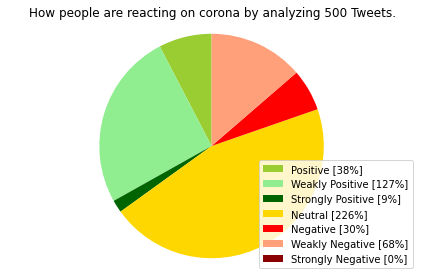

In [19]:
 def plotPieChart( positive, wpositive, spositive, negative, wnegative, snegative, neutral, searchTerm, noOfSearchTerms):
        labels = ['Positive [' + str(positive) + '%]', 'Weakly Positive [' + str(wpositive) + '%]','Strongly Positive [' + str(spositive) + '%]', 'Neutral [' + str(neutral) + '%]',
                  'Negative [' + str(negative) + '%]', 'Weakly Negative [' + str(wnegative) + '%]', 'Strongly Negative [' + str(snegative) + '%]']
        sizes = [positive, wpositive, spositive, neutral, negative, wnegative, snegative]
        colors = ['yellowgreen','lightgreen','darkgreen', 'gold', 'red','lightsalmon','darkred']
        patches, texts = plt.pie(sizes, colors=colors, startangle=90)
        plt.legend(patches, labels, loc="best")
        plt.title('How people are reacting on ' + searchTerm + ' by analyzing ' + str(noOfSearchTerms) + ' Tweets.')
        plt.axis('equal')
        plt.tight_layout()
        plt.show()
plotPieChart(positive, wpositive, spositive, negative, wnegative, snegative, neutral, search_words, NoOfTerms)

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as px
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

data = pd.read_csv('/home/prachi/Desktop/DEMO.csv',engine='python')

X = data.location
cmap1 = ['yellow','green','red']

plot = px.Figure(data = [ px.Bar(name='Neutral' , x = X,y = data.Neutral ,width=0.1) , 
                         px.Bar(name='positive' , x = X,y = data.Positive,width=0.1),
                        px.Bar(name='Negative' , x = X,y = data.Negative,width=0.1 )])
plot.update_layout(barmode='stack',colorway=cmap1)
plot.show()


In [37]:
import numpy as np
import pandas as pd

data = pd.read_csv('/home/prachi/Downloads/Sentiment Analysis/march.csv',engine='python')
data.Location.unique()

array(['ohio', 'Simple Pleasures Lane', 'Karachi, Pakistan',
       'South Africa', 'Pretoria, South Africa', 'Marseille, France',
       'Corona, CA', 'Valencia, Spain', 'Derbyshire, England',
       'Los Angeles', 'Tel Aviv', 'Curaçao',
       'North Hollywood, Los Angeles', 'Beverly Hills, California ',
       'Lexington, KY', 'St. Thomas, USVI', nan, 'Miami FL',
       'Chicago, IL', 'United Kingdom', 'England, United Kingdom',
       'leeds, yorkshire, uk', '9800 SW 77th Av Miami FL 33156',
       'Overlea, MD', 'Des Moines, Iowa', 'North Carolina',
       'Ljubljana, Slovenija', 'Lagos, Nigeria', 'Boogie Down Bronx',
       '849 College St Toronto, ON', 'Los Angeles, California, USA',
       'Yola, Nigeria', 'London', 'india//oman ',
       '32.94956446,-117.0566118', 'Tucson, AZ',
       'Dallas, TX and Los Angles, CA ', 'Boardman, OH',
       'Milano, Lombardia', 'Los Angeles, CA', 'Namibia', 'JAX | FL',
       'Ramsbottom, England', 'Beirut, Lebanon', 'Layton, UT',
       'Man